# CUSTOMER ANALYSIS - Features Engineering

Using k-means algorithm (2 clusters) :

1) Dimension number optimization (Kaiser's rule, elbow (% VAR), threshold (cum % VAR)).

2) Evaluate clustering results (silhouette score) standardized full features and dimension reduction.

3) 3D Visualization

Conclusion :

1) Dimension number optimization :
- Kaiser's rule : 22
- elbow : 2
- threshold cumulated % VAR (> 80 %) : 13

2) Silhouette score (13 dimensions) : 0.27 // silhouette score (3 dimensions) : 0.46

## LIBRARIES IMPORT

In [1]:
# Data process
import pandas as pd
import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler, MaxAbsScaler

# ML
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Features Engineering
from sklearn.decomposition import PCA

## DATA IMPORT

Get data from csv

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## DATA EXPLORATION

See what does data looklike

In [3]:
#df.head()

## DATA PREPROCESSING

### Pre process data according to data viz observations

In [4]:
df_p = df.drop(df[df.Year_Birth < 1920].index)

In [5]:
df_p.drop(df[df.Marital_Status =='Absurd'].index, inplace = True)
df_p.drop(df[df.Marital_Status =='YOLO'].index, inplace = True)
df_p.replace('Alone', 'Single', inplace = True)

In [6]:
df_p.drop(df[df.Income == 666666].index, inplace = True)

In [7]:
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())

df_p['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True).apply(convert_to_timestamp)

In [8]:
df_p.dropna(inplace=True)

In [9]:
df_p.reset_index(inplace = True, drop = True)

### Features selection and encoding

Slice df to define X_1, matrix of numerical features

In [10]:
X_1 = df_p[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

Label encode Education and Marital Status features

In [11]:
le = LabelEncoder()

In [12]:
edu = le.fit_transform(df_p['Education'])
marit = le.fit_transform(df_p['Marital_Status'])

Definition of df X_2, matrix of encoded features

In [13]:
X_2 = pd.concat([pd.DataFrame(edu.reshape((-1, 1))), pd.DataFrame(marit.reshape((-1, 1)))], axis = 1)
X_2.columns = ['Education', 'Marital_Status']

Definition of X, matrix of all features

In [14]:
X = pd.concat([X_1, X_2], axis = 1)
#X

### Features Standardization

In [15]:
#X_n = pd.DataFrame(normalize(X, axis = 0), columns = X.columns)
scaler = StandardScaler()
#scaler = MaxAbsScaler()

#scaler

In [16]:
#scaler.fit(X)

In [17]:
#scaler.mean_

In [18]:
X_n = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#X_n

## FEATURES ENGINEERING (PCA)

### Dimension number optimization

In [19]:
pca = PCA(n_components = 25).fit(X_n)
exp_var_ratio = round(pd.DataFrame(pca.explained_variance_ratio_, index=['PC' + str(o) for o in range(1, 26)]), 4) * 100
exp_var_ratio.columns = ['% VAR']
#exp_var_ratio

In [20]:
exp_var_cum = exp_var_ratio.cumsum()
exp_var_cum.columns = ['CUM % VAR']
#exp_var_cum

In [21]:
comp_opt = pd.concat([exp_var_ratio, exp_var_cum], axis = 1)
comp_opt.head()

,% VAR,CUM % VAR
PC1,25.90,25.90
PC2,8.28,34.18
PC3,7.43,41.61
PC4,6.36,47.97
PC5,4.59,52.56


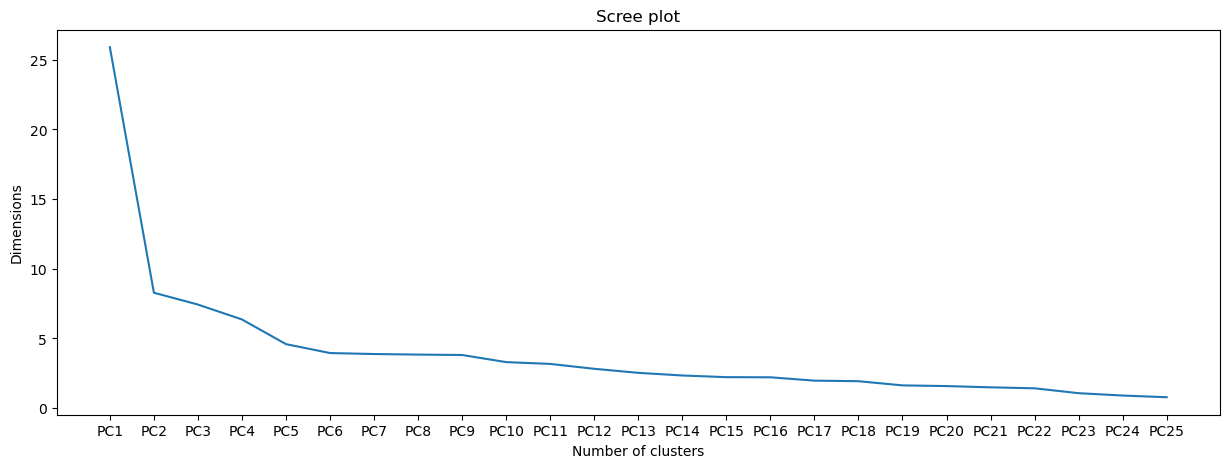

In [22]:
plt.figure(figsize=(15, 5))

plt.title('Scree plot')
plt.plot(comp_opt['% VAR'])
plt.xlabel('Number of clusters')
plt.ylabel('Dimensions')

plt.show()

Optimized dimensions (Kaiser's rule) : 22

Optimized dimensions (elbow) : 2

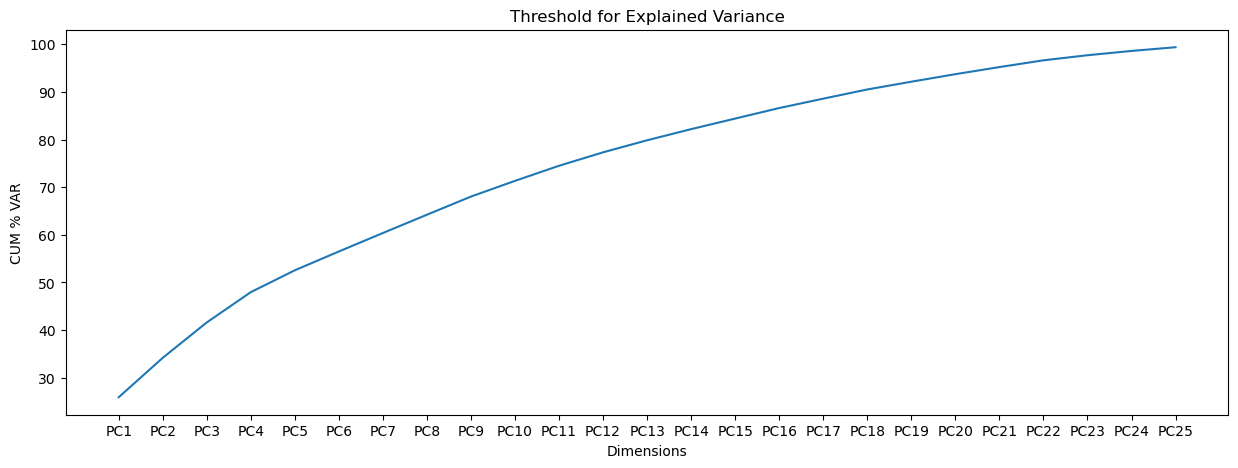

In [23]:
plt.figure(figsize=(15, 5))

plt.title('Threshold for Explained Variance')
plt.plot(comp_opt['CUM % VAR'])
plt.xlabel('Dimensions')
plt.ylabel('CUM % VAR')

plt.show()

Optimized dimensions (80 %) : 13

## CLASSIFICATION

In [24]:
n_clusters = 2
random_state = 130

### PCA 13 dimensions

In [25]:
n_components = 13

In [26]:
pca = PCA(n_components = n_components)

In [27]:
pca.fit(X_n)

PCA(n_components=13)

In [28]:
#X_n.shape

In [29]:
X_pca = pca.transform(X_n)
 
# Check the dimensions of data after PCA
#X_pca.shape

In [30]:
#pd.DataFrame(X_pca)

In [31]:
# Check the values of eigen vectors produced by principal components
pd.DataFrame(pca.components_, columns = X.columns)

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,-0.061204,0.330046,-0.252449,-0.051015,-0.037864,0.001291,0.304159,0.260451,0.310529,0.270536,...,-0.242764,0.019053,0.095824,0.187839,0.167450,0.057861,-0.013890,0.106682,0.020270,0.010156
1,-0.305799,0.048263,-0.060125,0.480768,-0.225836,0.014827,0.199069,-0.136299,-0.121796,-0.147493,...,0.236531,-0.032905,0.167205,-0.098534,-0.088043,0.060636,-0.002438,0.010366,0.200082,-0.005026
2,0.119236,-0.041772,0.104325,-0.149439,-0.046352,-0.112697,0.154687,-0.171635,-0.019205,-0.170564,...,0.166630,0.218609,0.366755,0.379626,0.329240,0.369803,-0.014365,0.436518,0.102203,-0.021872
3,0.317918,-0.171233,0.151283,-0.176570,-0.458751,-0.067048,-0.048051,0.156400,0.041998,0.151122,...,0.320012,0.217446,-0.201722,-0.093652,-0.033079,-0.106925,0.060504,0.219947,-0.317044,-0.056641
4,0.203023,-0.049072,0.029482,-0.087025,-0.158857,0.438675,0.053900,-0.001021,-0.038525,0.032949,...,0.096949,-0.489937,0.383858,0.102144,0.034442,0.243521,0.027641,-0.306681,-0.361358,0.082078
5,-0.248974,-0.039555,-0.048940,0.038324,-0.108900,0.104635,-0.047601,-0.009505,-0.003152,0.042297,...,-0.007697,0.150399,-0.058175,0.014694,-0.017471,0.088448,0.508041,0.070729,-0.077368,0.760255
6,-0.015742,0.007639,0.021511,0.121838,0.199766,0.664700,0.003976,-0.047229,-0.046724,-0.052998,...,-0.031083,0.549356,-0.113528,0.034878,0.083140,0.121510,0.081533,-0.150071,-0.076984,-0.268668
7,-0.039386,0.029940,-0.040792,0.114592,0.101803,-0.279021,-0.031830,0.035774,-0.067870,-0.009771,...,-0.050984,-0.085642,0.074091,0.020950,0.051350,0.048260,0.765381,-0.010888,-0.219975,-0.473266
8,0.136173,0.059812,0.145823,-0.230262,-0.268163,0.354405,0.119616,-0.032878,0.215752,-0.082385,...,0.021116,-0.155323,-0.086546,0.068616,-0.109288,-0.289304,0.335092,0.063916,0.544575,-0.115160
9,0.189256,0.116806,0.441015,0.126320,0.438481,-0.033979,-0.022018,0.003531,0.080256,0.022279,...,-0.053304,-0.040065,0.008920,0.142888,0.347493,-0.302499,0.056052,-0.043135,-0.067946,0.232185


### Train

In [32]:
model_pca = KMeans(n_clusters = n_clusters, random_state = random_state)

In [33]:
#model_pca.get_params()

In [34]:
model_pca.fit(X_pca)

KMeans(n_clusters=2, random_state=130)

In [35]:
#model_pca.inertia_

In [36]:
y_pred_pca = model_pca.predict(X_pca)

pd.DataFrame(y_pred_pca, columns=['y_pred']).value_counts()

y_pred
0         1331
1          877
dtype: int64

In [37]:
#model_pca.cluster_centers_

In [38]:
centers_pca = pd.DataFrame(model_pca.cluster_centers_)
centers_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.854378,-0.018080,0.085344,-0.015869,-0.008883,0.009083,0.000528,-0.012216,-0.019870,0.038580,-0.061851,0.002586,0.004967
1,2.814341,0.027439,-0.129525,0.024084,0.013481,-0.013785,-0.000801,0.018539,0.030156,-0.058552,0.093870,-0.003924,-0.007538


### Evaluation

In [39]:
sil_pca = silhouette_score(X_pca, model_pca.labels_)
round(sil_pca, 2)

0.27

## 3D View

### PCA 3 dimensions

In [40]:
n_components = 3

In [41]:
pca_3D = PCA(n_components = n_components)

In [42]:
pca_3D.fit(X_n)

PCA(n_components=3)

In [43]:
#X_n.shape

In [44]:
X_pca_3D = pca_3D.transform(X_n)
 
# Check the dimensions of data after PCA
#X_pca_3D.shape

In [45]:
#pd.DataFrame(X_pca)

In [46]:
# Dump components relations with features
pd.DataFrame(pca_3D.components_, columns = X.columns, index = ['PC-1','PC-2','PC-3'])

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
PC-1,-0.061204,0.330046,-0.252449,-0.051016,-0.037865,0.001291,0.304159,0.260450,0.310530,0.270538,...,-0.242764,0.019054,0.095825,0.187836,0.167453,0.057860,-0.013889,0.106680,0.020269,0.010155
PC-2,-0.306388,0.048156,-0.060172,0.480901,-0.226226,0.014773,0.199119,-0.135538,-0.122288,-0.147724,...,0.236799,-0.033218,0.167655,-0.097501,-0.088504,0.059862,-0.002595,0.010869,0.199910,-0.004771
PC-3,0.120416,-0.041418,0.104787,-0.149040,-0.046234,-0.112564,0.154692,-0.171855,-0.018606,-0.170684,...,0.166088,0.219503,0.364885,0.378864,0.329805,0.372125,-0.015003,0.435516,0.102957,-0.022379


### Train

In [47]:
model_pca_3D = KMeans(n_clusters = n_clusters, random_state = random_state)

In [48]:
model_pca_3D.fit(X_pca_3D)

KMeans(n_clusters=2, random_state=130)

In [49]:
y_pred_pca_3D = model_pca_3D.predict(X_pca_3D)

pd.DataFrame(y_pred_pca_3D, columns=['y_pred']).value_counts()

y_pred
0         1331
1          877
dtype: int64

In [50]:
centers_pca_3D = pd.DataFrame(model_pca_3D.cluster_centers_)
centers_pca_3D

,0,1,2
0,-1.856098,-0.020216,0.086511
1,2.811629,0.030623,-0.131047


### Evaluation

In [51]:
sil_pca_3D = silhouette_score(X_pca_3D, model_pca_3D.labels_)
round(sil_pca_3D, 2)

0.46

### Visualization

Text(0, 0.5, 'pc3')

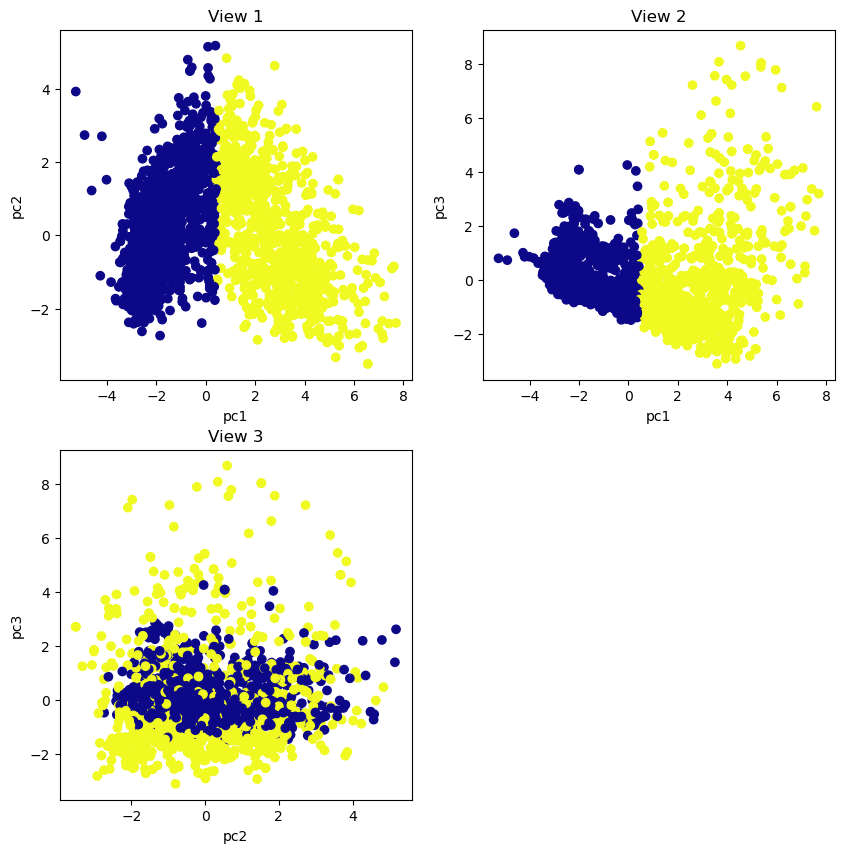

In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)

plt.scatter(X_pca_3D[:,0], X_pca_3D[:,1], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 1')
plt.xlabel('pc1')
plt.ylabel('pc2')


plt.subplot(2, 2, 2)

plt.scatter(X_pca_3D[:,0], X_pca_3D[:,2], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 2')
plt.xlabel('pc1')
plt.ylabel('pc3')


plt.subplot(2, 2, 3)

plt.scatter(X_pca_3D[:,1], X_pca_3D[:,2], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 3')
plt.xlabel('pc2')
plt.ylabel('pc3')

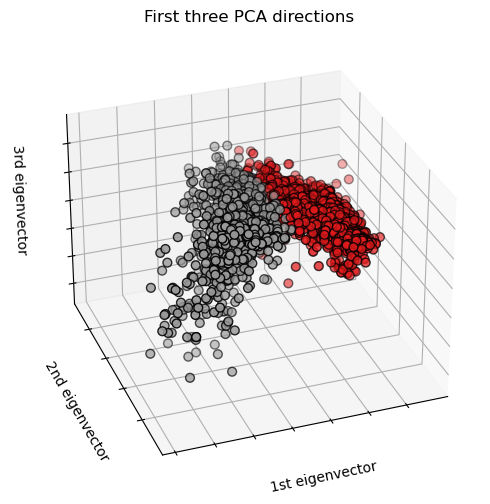

In [53]:
# To getter a better understanding of interaction of the dimensions, plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = X_pca_3D
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_pred_pca_3D,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()